# IMPORTING ALL NECESSARY LIBRARIES

In [83]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# LOADING ALL DATASETS

In [84]:
os.listdir()

['.ipynb_checkpoints',
 'Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24',
 'ALL',
 'AudioWAV',
 'audio_speech_actors_01-24',
 'data_10.json',
 'Data_path.csv',
 'my4EmotionDatabases-mfccs',
 'SER.ipynb',
 'serfp.ipynb',
 'TESS Toronto emotional speech set data',
 'Untitled.ipynb']

In [134]:
#loading data with diff key words
TESS = "C:/Users/mailt/Desktop/FP/TESS Toronto emotional speech set data/"
RAV = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/"
SAVEE ="C:/Users/mailt/Desktop/FP/ALL/"
CREMA = "C:/Users/mailt/Desktop/FP/AudioWAV/"

# Running one example 
dir_list = os.listdir(SAVEE)
dir_list[:5]



['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [86]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)
print(dir_list)

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav', 'DC_a06.wav', 'DC_a07.wav', 'DC_a08.wav', 'DC_a09.wav', 'DC_a10.wav', 'DC_a11.wav', 'DC_a12.wav', 'DC_a13.wav', 'DC_a14.wav', 'DC_a15.wav', 'DC_d01.wav', 'DC_d02.wav', 'DC_d03.wav', 'DC_d04.wav', 'DC_d05.wav', 'DC_d06.wav', 'DC_d07.wav', 'DC_d08.wav', 'DC_d09.wav', 'DC_d10.wav', 'DC_d11.wav', 'DC_d12.wav', 'DC_d13.wav', 'DC_d14.wav', 'DC_d15.wav', 'DC_f01.wav', 'DC_f02.wav', 'DC_f03.wav', 'DC_f04.wav', 'DC_f05.wav', 'DC_f06.wav', 'DC_f07.wav', 'DC_f08.wav', 'DC_f09.wav', 'DC_f10.wav', 'DC_f11.wav', 'DC_f12.wav', 'DC_f13.wav', 'DC_f14.wav', 'DC_f15.wav', 'DC_h01.wav', 'DC_h02.wav', 'DC_h03.wav', 'DC_h04.wav', 'DC_h05.wav', 'DC_h06.wav', 'DC_h07.wav', 'DC_h08.wav', 'DC_h09.wav', 'DC_h10.wav', 'DC_h11.wav', 'DC_h12.wav', 'DC_h13.wav', 'DC_h14.wav', 'DC_h15.wav', 'DC_n01.wav', 'DC_n02.wav', 'DC_n03.wav', 'DC_n04.wav', 'DC_n05.wav', 'DC_n06.wav', 'DC_n07.wav', 'DC_n08.wav', 'DC_n09.wav', 'DC_n10.wav', 'DC_n11.wav', 'DC_n

# savee dataset

In [87]:


# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_surprise     60
male_sad          60
male_disgust      60
male_angry        60
male_happy        60
male_fear         60
Name: labels, dtype: int64

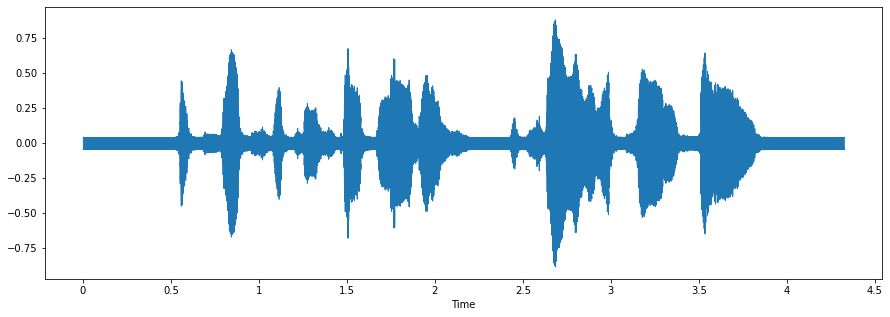

In [88]:
# fearspeech_analyse
import librosa.display as waveshow
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)


In [89]:
os.listdir()

['.ipynb_checkpoints',
 'Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24',
 'ALL',
 'AudioWAV',
 'audio_speech_actors_01-24',
 'data_10.json',
 'Data_path.csv',
 'my4EmotionDatabases-mfccs',
 'SER.ipynb',
 'serfp.ipynb',
 'TESS Toronto emotional speech set data',
 'Untitled.ipynb']

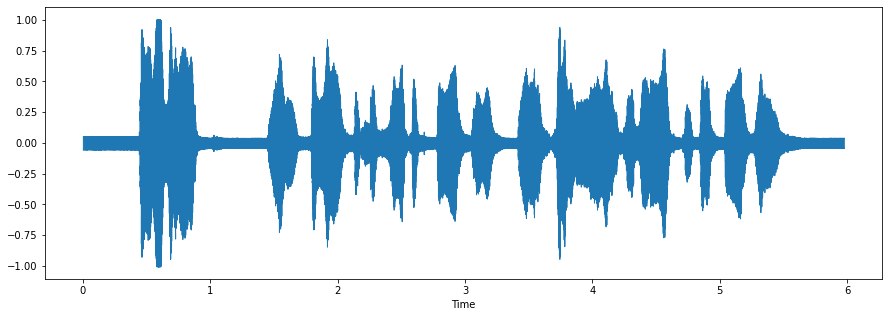

In [90]:
# happy_speech_analyse
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

# ravdess dataset

In [91]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
print(part)
print(fname)

['03', '01', '08', '02', '02', '02', '24']
['03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-24.wav', '03-01-01-01-02-01-24.wav', '03-01-01-01-02-02-24.wav', '03-01-02-01-01-01-24.wav', '03-01-02-01-01-02-24.wav', '03-01-02-01-02-01-24.wav', '03-01-02-01-02-02-24.wav', '03-01-02-02-01-01-24.wav', '03-01-02-02-01-02-24.wav', '03-01-02-02-02-01-24.wav', '03-01-02-02-02-02-24.wav', '03-01-03-01-01-01-24.wav', '03-01-03-01-01-02-24.wav', '03-01-03-01-02-01-24.wav', '03-01-03-01-02-02-24.wav', '03-01-03-02-01-01-24.wav', '03-01-03-02-01-02-24.wav', '03-01-03-02-02-01-24.wav', '03-01-03-02-02-02-24.wav', '03-01-04-01-01-01-24.wav', '03-01-04-01-01-02-24.wav', '03-01-04-01-02-01-24.wav', '03-01-04-01-02-02-24.wav', '03-01-04-02-01-01-24.wav', '03-01-04-02-01-02-24.wav', '03-01-04-02-02-01-24.wav', '03-01-04-02-02-02-24.wav', '03-01-05-01-01-01-24.wav', '03-01-05-01-01-02-24.wav', '03-01-05-01-02-01-24.wav', '03-01-05-01-02-02-24.wav', '03-01-05-02-01-01-24.wav', '03-01-05-02-01-02-24.wav', '03-

In [92]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_angry          96
female_fear         96
female_happy        96
female_sad          96
male_fear           96
male_sad            96
female_angry        96
female_surprise     96
male_disgust        96
male_happy          96
male_surprise       96
female_disgust      96
Name: labels, dtype: int64

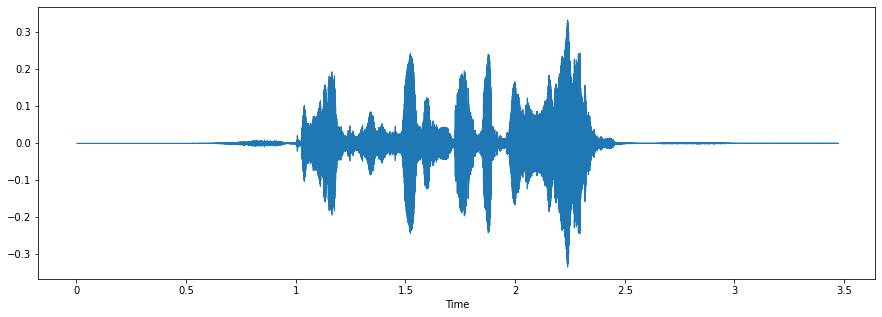

In [93]:
# fearful track analyse
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

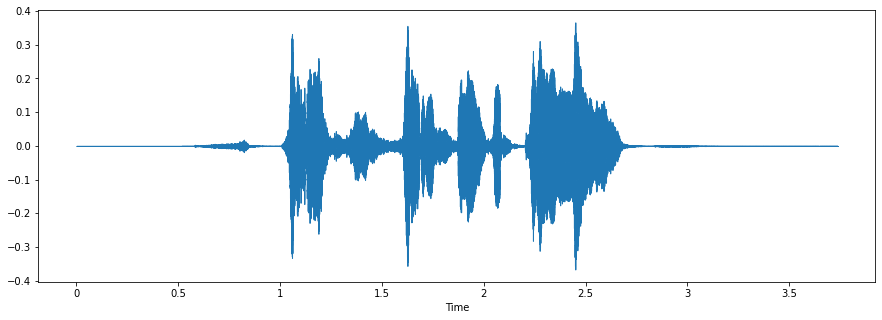

In [94]:
# happy track analyse
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

# TESS dataset

In [95]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'TESS Toronto emotional speech set data',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [96]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_neutral     400
female_fear        400
female_happy       400
female_angry       400
female_surprise    400
female_disgust     400
female_sad         400
Unknown             14
Name: labels, dtype: int64

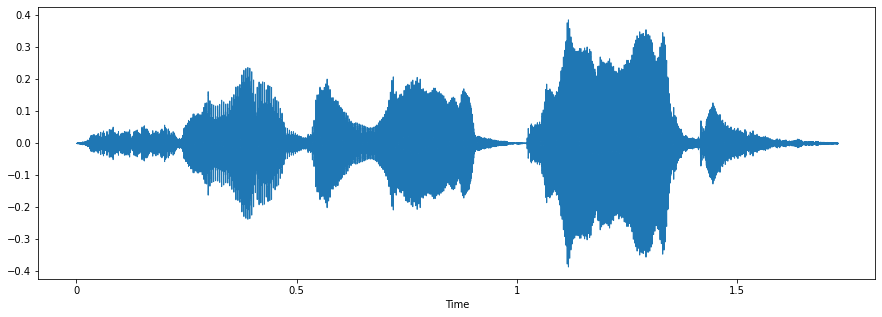

In [97]:
# fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

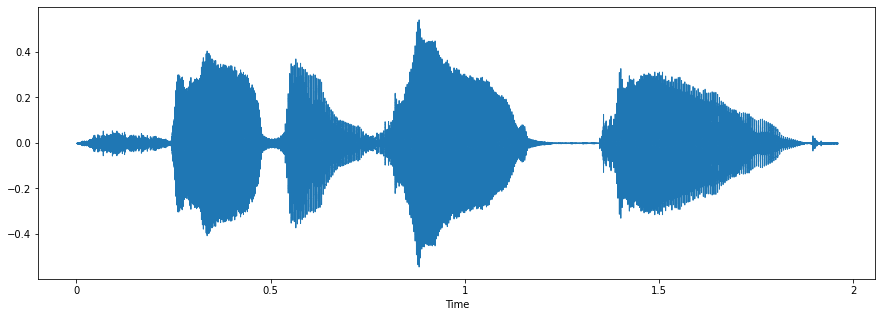

In [98]:
# happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

# CREMA-D dataset

In [99]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])
['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav']

In [100]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_disgust      671
male_fear         671
male_happy        671
male_angry        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

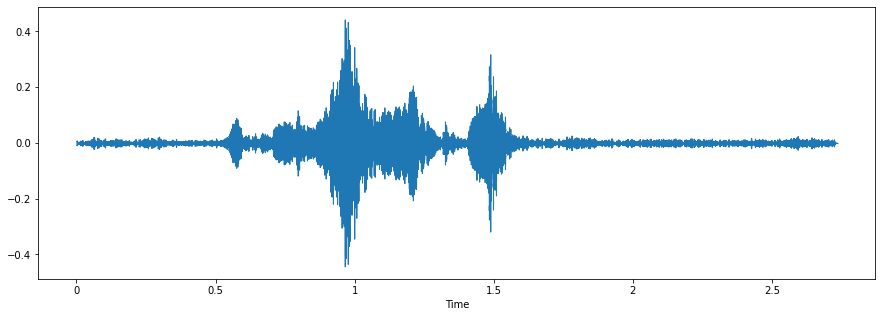

In [101]:
# use the well known Librosa library for this task 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

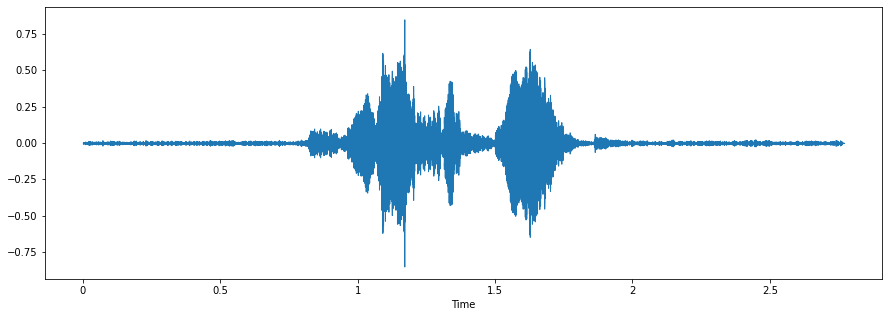

In [102]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [135]:
#combiining all 4 datasets as csv file


df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_angry       1096
female_fear        1096
female_happy       1096
female_sad         1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_disgust        827
male_fear           827
male_happy          827
male_angry          827
male_sad            827
female_surprise     496
male_surprise       156
Unknown              14
Name: labels, dtype: int64


# FEATURE EXTRACT

In [108]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("Data_path.csv")
ref.head(700)

labels   source                                               path
0      male_angry    SAVEE           C:/Users/mailt/Desktop/FP/ALL/DC_a01.wav
1      male_angry    SAVEE           C:/Users/mailt/Desktop/FP/ALL/DC_a02.wav
2      male_angry    SAVEE           C:/Users/mailt/Desktop/FP/ALL/DC_a03.wav
3      male_angry    SAVEE           C:/Users/mailt/Desktop/FP/ALL/DC_a04.wav
4      male_angry    SAVEE           C:/Users/mailt/Desktop/FP/ALL/DC_a05.wav
..            ...      ...                                                ...
695  female_angry  RAVDESS  C:/Users/mailt/Desktop/FP/audio_speech_actors_...
696   female_fear  RAVDESS  C:/Users/mailt/Desktop/FP/audio_speech_actors_...
697   female_fear  RAVDESS  C:/Users/mailt/Desktop/FP/audio_speech_actors_...
698   female_fear  RAVDESS  C:/Users/mailt/Desktop/FP/audio_speech_actors_...
699   female_fear  RAVDESS  C:/Users/mailt/Desktop/FP/audio_speech_actors_...

[700 rows x 3 columns]

In [109]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

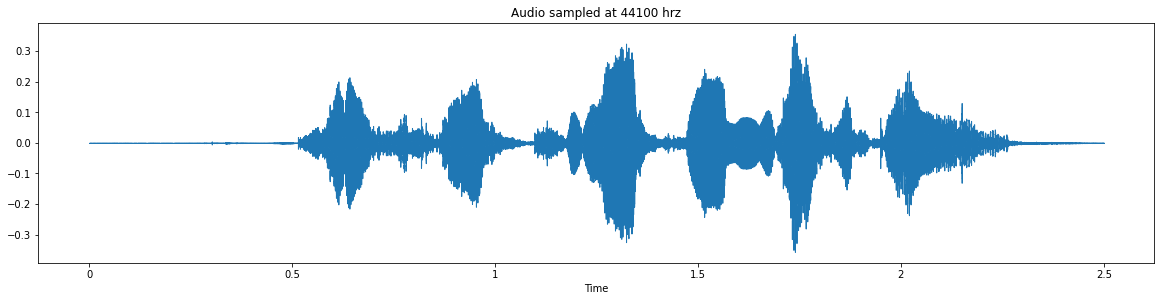

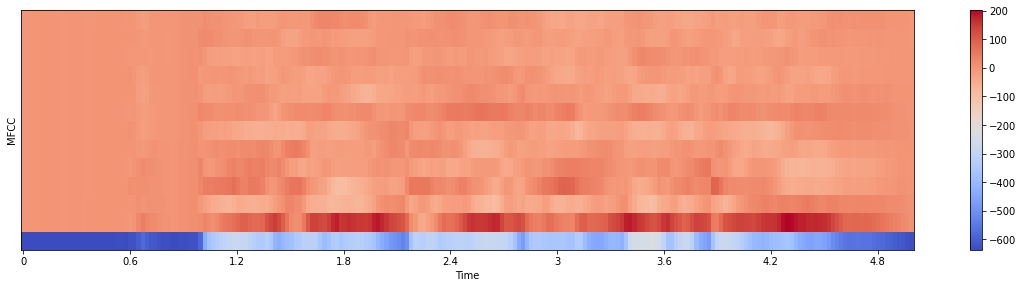

In [110]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

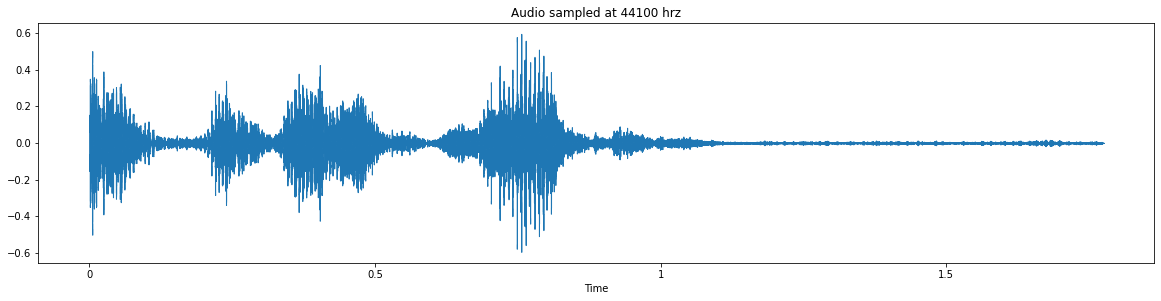

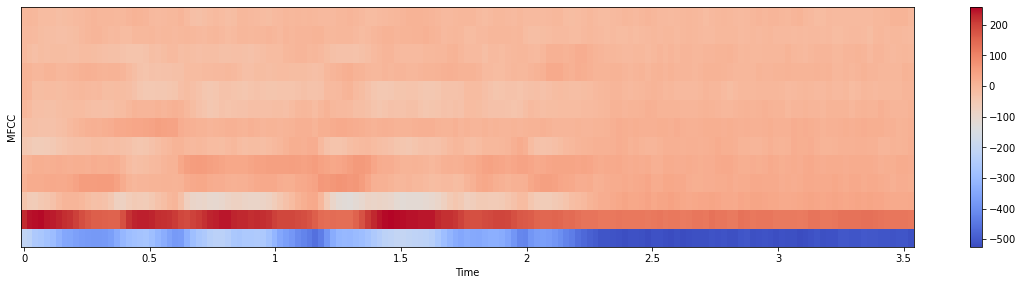

In [111]:
# Source - crema-d; Gender - Female; Emotion - Angry 
path = "C:/Users/mailt/Desktop/FP/AudioWAV/1001_DFA_ANG_XX.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

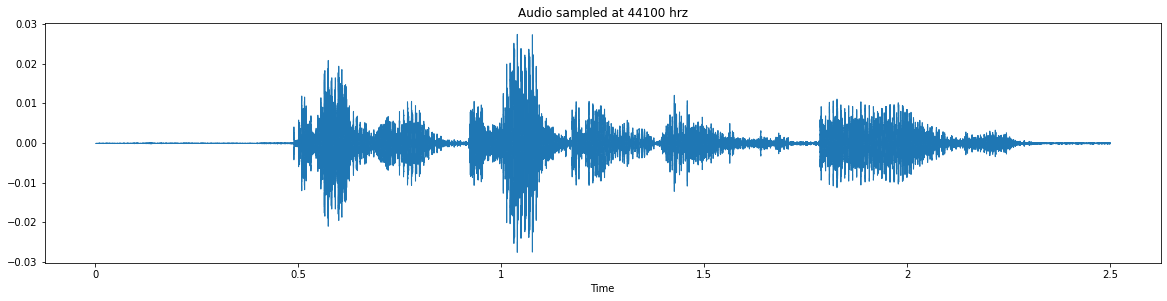

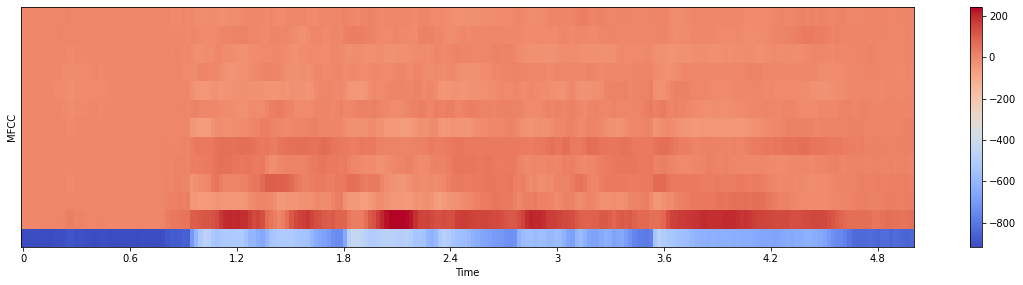

In [112]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

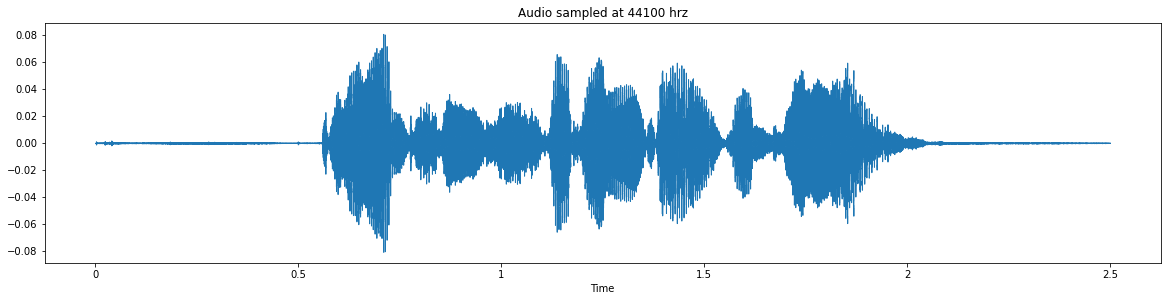

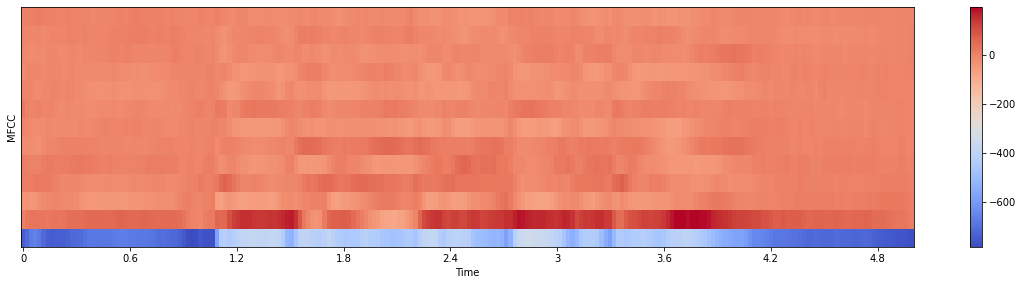

In [113]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


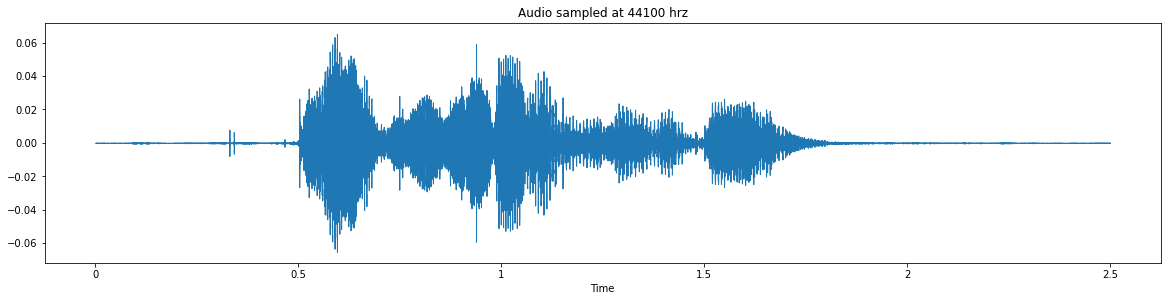

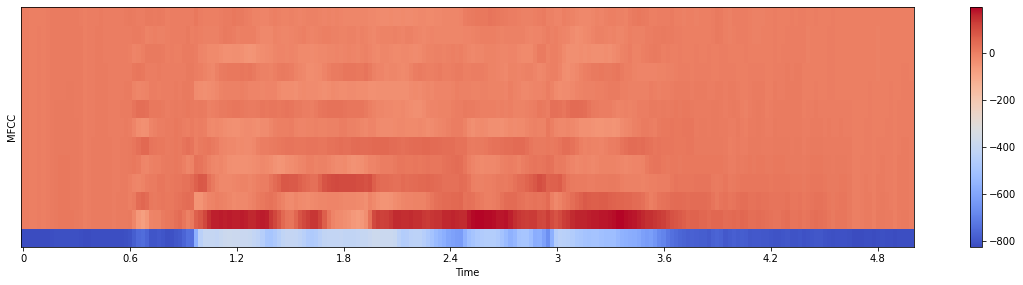

In [114]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)


216
216


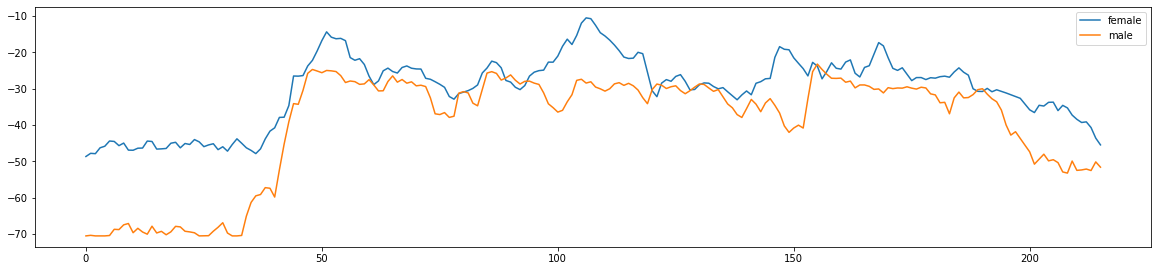

In [115]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()


216
216


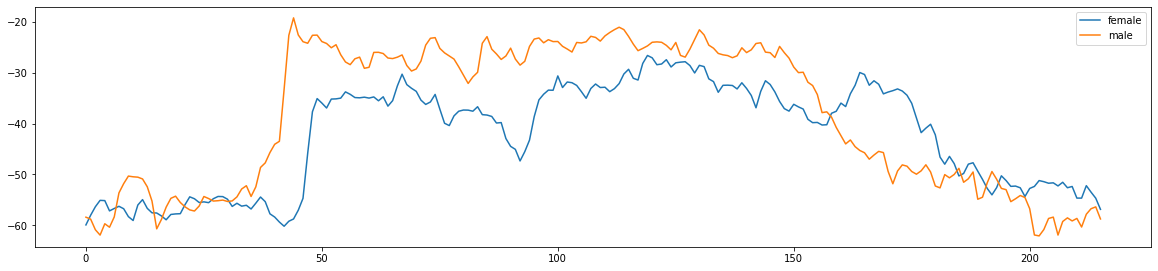

In [116]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

153
216


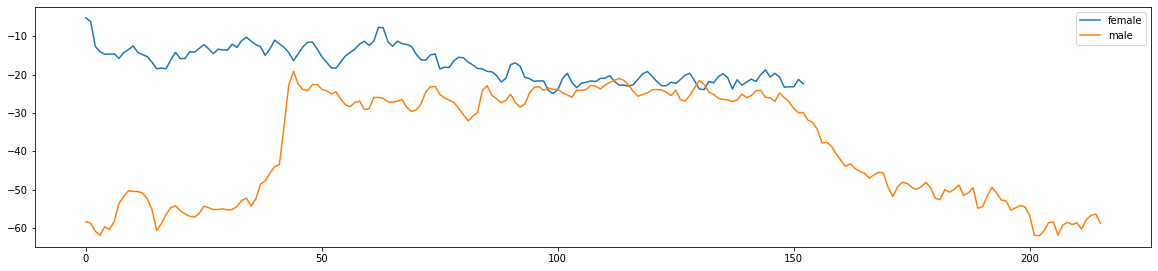

In [117]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "C:/Users/mailt/Desktop/FP/AudioWAV/1001_DFA_ANG_XX.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "C:/Users/mailt/Desktop/FP/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [129]:
import json
import os
import math

In [131]:
DATASET_PATH = "C:/Users/mailt/Desktop/FP/combine"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [132]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [133]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: combine\AudioWAV
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1001_IWL_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1001_MTI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1001_TIE_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1001_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_IEO_DIS_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_IEO_FEA_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_ITH_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_ITH_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_IWL_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_IWL_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_IWW_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_MTI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1002_TAI_DIS_XX.wav, segment:1
C:/Users

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1004_WSI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1004_WSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1004_WSI_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1004_WSI_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_DFA_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_DFA_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_IEO_FEA_MD.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_IOM_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_IOM_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_IOM_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_IOM_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_ITH_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1005_ITH_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_IWW_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_IWW_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_IWW_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_MTI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_MTI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_MTI_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_MTI_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_MTI_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_MTI_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_TAI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_TAI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_TAI_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1007_TAI_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_IEO_ANG_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_IEO_ANG_LO.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_IEO_SAD_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_ITH_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_ITS_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_IWW_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_TIE_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_TIE_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_WSI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1011_WSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1012_ITS_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1012_IWL_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TIE_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TIE_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TIE_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TIE_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TIE_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_TSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_WSI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1020_WSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1021_DFA_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1021_IEO_ANG_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1021_IEO_DIS_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1021_IEO_FEA_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1028_MTI_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1028_TAI_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1028_TIE_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1028_TIE_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1028_TIE_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1028_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_ITH_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_IWL_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_MTI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_MTI_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_MTI_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_MTI_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1029_TAI_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_ITH_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_IWL_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_IWL_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_MTI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_MTI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_TIE_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1039_TIE_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1040_ITS_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1040_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1040_WSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1041_IWL_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1041_IWW_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1041_TAI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1051_WSI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1051_WSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_IEO_ANG_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_IEO_ANG_MD.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_IEO_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_IEO_SAD_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_IOM_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_IOM_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_ITH_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_ITH_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_ITH_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_ITS_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1052_ITS_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_DIS_LO.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_DIS_MD.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_FEA_LO.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_FEA_MD.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_HAP_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_HAP_MD.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IEO_SAD_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IOM_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_IOM_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_ITH_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_ITH_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_ITH_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1064_ITH_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_IWL_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_IWL_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_IWW_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_MTI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_MTI_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_MTI_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TAI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TAI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TAI_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TAI_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TIE_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TIE_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1072_TIE_NEU_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1082_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_DFA_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IEO_ANG_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IEO_DIS_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IEO_DIS_LO.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IEO_SAD_HI.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IOM_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_ITH_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_ITH_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_ITS_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IWL_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IWL_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1083_IWL_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi

C:/Users/mailt/Desktop/FP/combine\AudioWAV\1089_TIE_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1089_TIE_HAP_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1089_TIE_SAD_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1089_TSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1089_WSI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_ITH_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_ITH_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_ITH_FEA_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_IWL_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_IWL_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_MTI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_TAI_ANG_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\AudioWAV\1090_TAI_DIS_XX.wav, segment:1
C:/Users/mailt/Desktop/FP/combine\Audi